<a href="https://colab.research.google.com/github/AlanKopiler/alura/blob/main/Aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)

##**Desafio** **1**

Um intervalo de confiança é uma estimativa de intervalo para um parâmetro de interesse de uma população. É estimado um valor para uma faixa de possíveis estimativas. A probabilidade destas estimativas são prováveis será determinado pelo coeficiente de confiança $ (1-\alpha) $, para $ \alpha \in (0, 1) $.

A confiabilidade de uma estimativa pode ser indicada atraavés de Intervalos de confiança. Quanto menores forem as diferenças entre as estimativas, o intervalo de confiança menor será mais confiáveldo que um intervalo de confiança maior e vice-versa. 

A ausência de um determinado valor no intervalo de confiança indica uma probabilidade baixa de que esse valor represente a média populacional. No entanto, se um valor estiver presente no intervalo, isso não significa necessariamente que ele representa a média.

## **Deafio** **2**

In [24]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]
x = notas_entrada
y = notas_saida 

def regressor_arvore(nivel, num_folhas):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel, min_samples_leaf=num_folhas)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino com profundidade {nivel} e nº mínimo de folhas {num_folhas} = {(resultados['train_score']*-1).mean()} | Teste com profundidade {nivel} e nº mínimo de folhas {num_folhas} = {(resultados['test_score']*-1).mean()}\n\n")
regressor_arvore(3,2)
for i in range(1,21):
    for j in range(1,11):
        regressor_arvore(i,j)    

Treino com profundidade 3 e nº mínimo de folhas 2 = 6021.275229419075 | Teste com profundidade 3 e nº mínimo de folhas 2 = 6054.767567442072


Treino com profundidade 1 e nº mínimo de folhas 1 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 1 = 7857.871770206351


Treino com profundidade 1 e nº mínimo de folhas 2 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 2 = 7857.871770206351


Treino com profundidade 1 e nº mínimo de folhas 3 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 3 = 7857.871770206351


Treino com profundidade 1 e nº mínimo de folhas 4 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 4 = 7857.871770206351


Treino com profundidade 1 e nº mínimo de folhas 5 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 5 = 7857.871770206351


Treino com profundidade 1 e nº mínimo de folhas 6 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 6 = 7857.871770206351



## **Desafio 3**

In [28]:
from sklearn.model_selection import GridSearchCV
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")
partes = KFold(n_splits = 10, shuffle=True)
# Estimando hiperparâmetros da árvore de decisão regressora
#
base_estimator=DecisionTreeRegressor()

# Parâmetros a serem avaliados: profundidade = 1, 2 e 3; número mínimo de folhas = 1, 2 e 4
#
param_grid = {'max_depth': [1,2,3], 'min_samples_leaf': [1,2,4]}

# Procurando os melhores parãmetros da lista
#
search = GridSearchCV(base_estimator, param_grid, cv=10)

# Utilizando os melhores parâmetros na CrossValidation
#
resultados2 = cross_validate(search, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)

# Printando o melhor resultado obtido com os parâmetros de GridSearchCV
#
print(f"Treino = {(resultados2['train_score']*-1).mean()} | Teste = {(resultados2['test_score']*-1).mean()}\n\n")

Treino = 6020.650869912285 | Teste = 6055.177763120732




## **Deafio 4**

A precisão de um modelo nos dados de validação pode atingir o pico após o treinamento por várias épocas e, então, estagnar ou começar a diminuir.

Em outras palavras, o modelo se ajusta demais aos dados de treinamento. Aprender como lidar com o ovefiting é importante. Embora muitas vezes seja possível alcançar alta precisão no conjunto de treinamento, o que realmente se quer é desenvolver modelos que generalizem bem para um conjunto de teste (ou dados que eles não tenham visto antes).

O oposto de overfitting é underfitting. O underfiting ocorre quando ainda há espaço para melhorias nos dados de teste. Isso pode acontecer por vários motivos: Se o modelo não for poderoso o suficiente, estiver super regularizado ou simplesmente não tiver sido treinado por tempo suficiente. Isso significa que a rede não aprendeu os padrões relevantes nos dados de treinamento.

Porém, se você treinar por muito tempo, o modelo começará a se ajustar demais e aprender padrões dos dados de treinamento que não se generalizam para os dados de teste. Precisa-se encontrar um equilíbrio. 

Para evitar overfitting, a melhor solução é usar dados de treinamento mais completos. O conjunto de dados deve abranger toda a gama de entradas que o modelo deve manipular. Dados adicionais só podem ser úteis se cobrirem casos novos e interessantes.

Um modelo treinado em dados mais completos irá naturalmente generalizar melhor. Quando isso não for mais possível, a próxima melhor solução é usar técnicas como a regularização. Isso impõe restrições à quantidade e ao tipo de informação que seu modelo pode armazenar. Se uma rede só puder memorizar um pequeno número de padrões, o processo de otimização a forçará a se concentrar nos padrões mais proeminentes, que têm uma chance melhor de generalizar bem.

## **Deafio 5**

In [29]:
# Vetor para armazenar resultados de treino
#
train_results=[]

# Vetor para armazenar resultados de teste
#
test_results=[]

def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

    # Salvando dados de treino no vetor train_results
    #
    train_results.append((resultados['train_score']*-1).mean())
    
    # Salvando dados de teste no vetor test_results
    #
    test_results.append((resultados['test_score']*-1).mean())
for i in range(1,21):
    regressor_arvore(i)

Treino = 7844.952652412207|Teste = 7857.871770206351
Treino = 6527.783475408351|Teste = 6556.886287657656
Treino = 6021.275229419075|Teste = 6054.767567442072
Treino = 5760.834451245899|Teste = 5815.707286597402
Treino = 5598.158955426787|Teste = 5675.196789060744
Treino = 5469.677369145869|Teste = 5593.304363812442
Treino = 5369.458309852721|Teste = 5541.646599457925
Treino = 5276.16965707928|Teste = 5542.053091078966
Treino = 5166.713159932668|Teste = 5608.390265709719
Treino = 5022.598049115693|Teste = 5761.4934268457555
Treino = 4833.560706021637|Teste = 5955.331403579403
Treino = 4598.125022484774|Teste = 6217.553668629227
Treino = 4316.3791662866815|Teste = 6521.403312280134
Treino = 4000.6209880837496|Teste = 6853.984106997142
Treino = 3655.8197526274853|Teste = 7224.863053512405
Treino = 3295.832684540846|Teste = 7636.168819779455
Treino = 2931.7212612043877|Teste = 8071.851486256819
Treino = 2575.59534021339|Teste = 8452.126711298857
Treino = 2233.574203221172|Teste = 8833.470

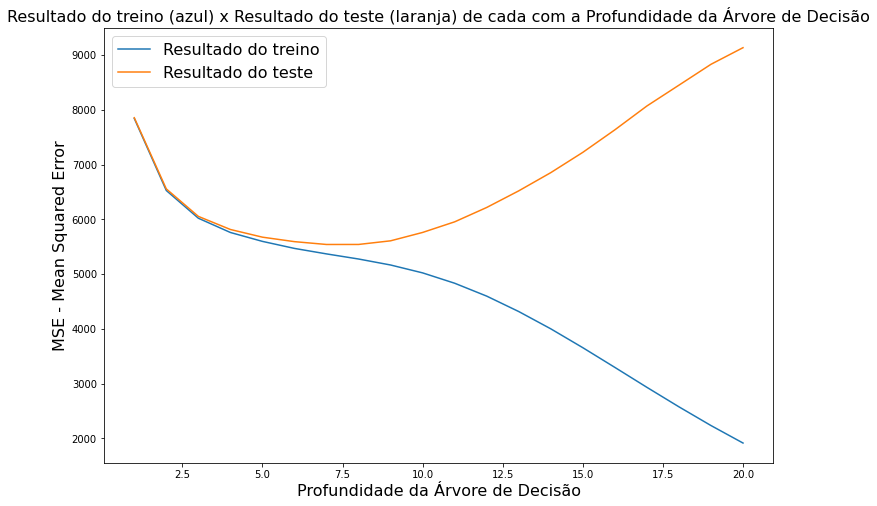

In [30]:
plt.figure(figsize=(12,8))
plt.plot(range(1,21), train_results, range(1,21), test_results)
plt.title('Resultado do treino (azul) x Resultado do teste (laranja) de cada com a Profundidade da Árvore de Decisão',fontsize=16)
plt.xlabel('Profundidade da Árvore de Decisão',fontsize=16)
plt.ylabel('MSE - Mean Squared Error', fontsize=16)
plt.legend(['Resultado do treino','Resultado do teste'], fontsize=16)